In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import numpy as np

In [ ]:
import pandas as pd
df=pd.read_csv('/content/PurchasesFINAL12312016.csv')
print(df.head())
print(df.info())

           InventoryId  Store  Brand                   Description   Size  \
0    69_MOUNTMEND_8412     69   8412     Tequila Ocho Plata Fresno  750mL   
1     30_CULCHETH_5255     30   5255  TGI Fridays Ultimte Mudslide  1.75L   
2    34_PITMERDEN_5215     34   5215  TGI Fridays Long Island Iced  1.75L   
3  1_HARDERSFIELD_5255      1   5255  TGI Fridays Ultimte Mudslide  1.75L   
4    76_DONCASTER_2034     76   2034     Glendalough Double Barrel  750mL   

   VendorNumber                   VendorName  PONumber      PODate  \
0           105  ALTAMAR BRANDS LLC               8124  2015-12-21   
1          4466  AMERICAN VINTAGE BEVERAGE        8137  2015-12-22   
2          4466  AMERICAN VINTAGE BEVERAGE        8137  2015-12-22   
3          4466  AMERICAN VINTAGE BEVERAGE        8137  2015-12-22   
4           388  ATLANTIC IMPORTING COMPANY       8169  2015-12-24   

  ReceivingDate InvoiceDate     PayDate  PurchasePrice  Quantity  Dollars  \
0    2016-01-02  2016-01-04  2016-02-16

Store
1      4844714.06
2      4504046.53
3       286621.82
4      2247278.50
5       956212.60
         ...     
76    17525106.25
77     2656433.43
78     2231545.53
79     3993526.13
81     1742230.28
Name: Dollars, Length: 80, dtype: float64


<Axes: xlabel='Store'>

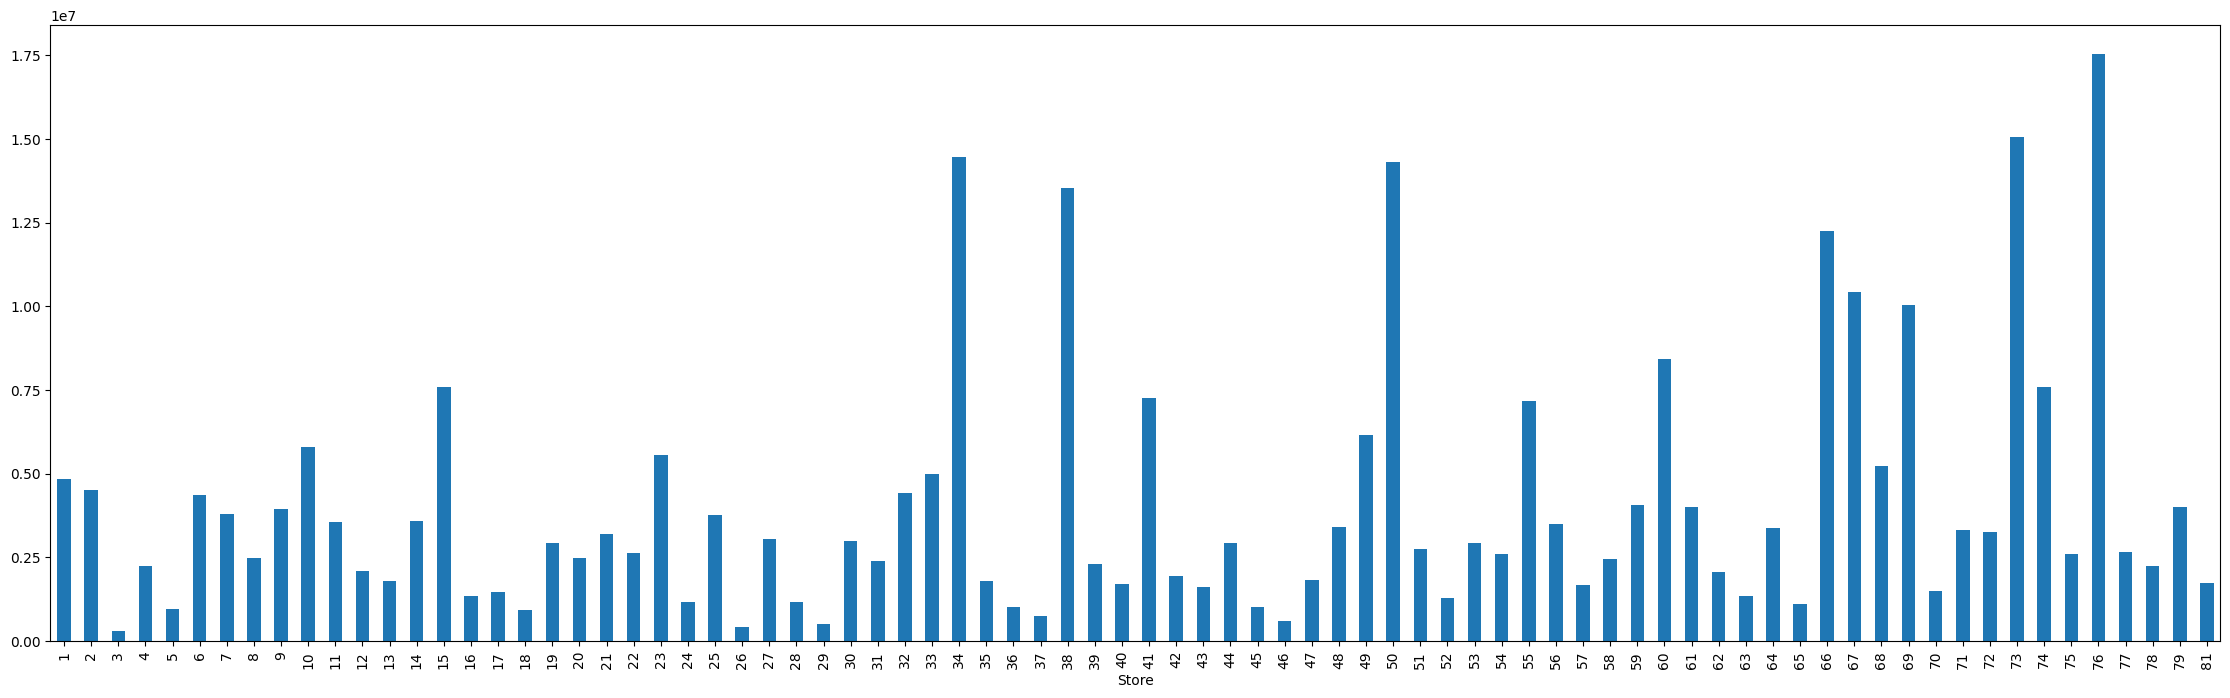

In [ ]:
df_s =  df.groupby(by='Store')['Dollars'].sum()
fig = plt.figure(figsize=(28,8))
df_s.plot(kind='bar')

In [ ]:
df['PayDate']=pd.to_datetime(df['PayDate'])
#print(df.info())

df3 = df.groupby(by='PayDate')[['Quantity','Dollars']].sum()
df3
# 对广告费表：求每天的投放广告费用支出\ndf4 = pd.DataFrame(df2.groupby(by='投放日期')['广告费'].sum())\n# df3,df4 结果如下：自动将分组字段作为了索引且是日期类型,方便后面计算。\n# 将df3和df4横向连接,连接键为索引 所以用left_index和right_index方便\ndf = df3.merge(df4,left_index=True,right_index=True)\ndf

,Quantity,Dollars
PayDate,,
2016-02-04,3275,36592.75
2016-02-05,12693,155146.89
2016-02-06,5169,60749.39
2016-02-07,1058,7688.22
2016-02-08,3561,21626.85
...,...,...
2017-02-15,680,13626.89
2017-02-16,16422,126291.71
2017-02-17,186230,1839735.12


In [ ]:
"""按月汇总 ：这里的resample()重新采样和频率转换函数,参数'M'是month的首字母,
因此表示将原日期以天数为单位转换为以月为最小单位的日期(但输出格式为xxxx-xx-31日为每月的最后一天)；
.sum()就相当于按照月分组后对列进行求和；
to_period('M') 是将xxxx-xx-31中的日彻底去掉,变成xxxx-xx
"""
month_sum = df3.resample('M').sum().to_period('M')
# 求月环比：pct_change()是特别重要环比函数：相对于该行照比上一行的值增加或减少了多少(0,1)间,这里*100转为以百分号为单位
month_sum['月环比'] = round(month_sum['Dollars'].pct_change()*100,2)
month_sum
# 第一行月环比为NaN 因为它是第一行,前面没有可比的数字  你也可以通过fillna(0) 填充为0

<ipython-input-4-b8fc9cdfb963>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_sum = df3.resample('M').sum().to_period('M')


,Quantity,Dollars,月环比
PayDate,,,
2016-02,1242845,11696464.50,NaN
2016-03,2193777,19786690.64,69.17
2016-04,2278126,20364895.69,2.92
2016-05,2218880,20548600.48,0.90
2016-06,2315879,21584530.39,5.04
2016-07,3047121,29975465.99,38.87
2016-08,3328264,32362458.98,7.96
2016-09,3153984,30863337.34,-4.63
2016-10,3220529,30247620.31,-1.99


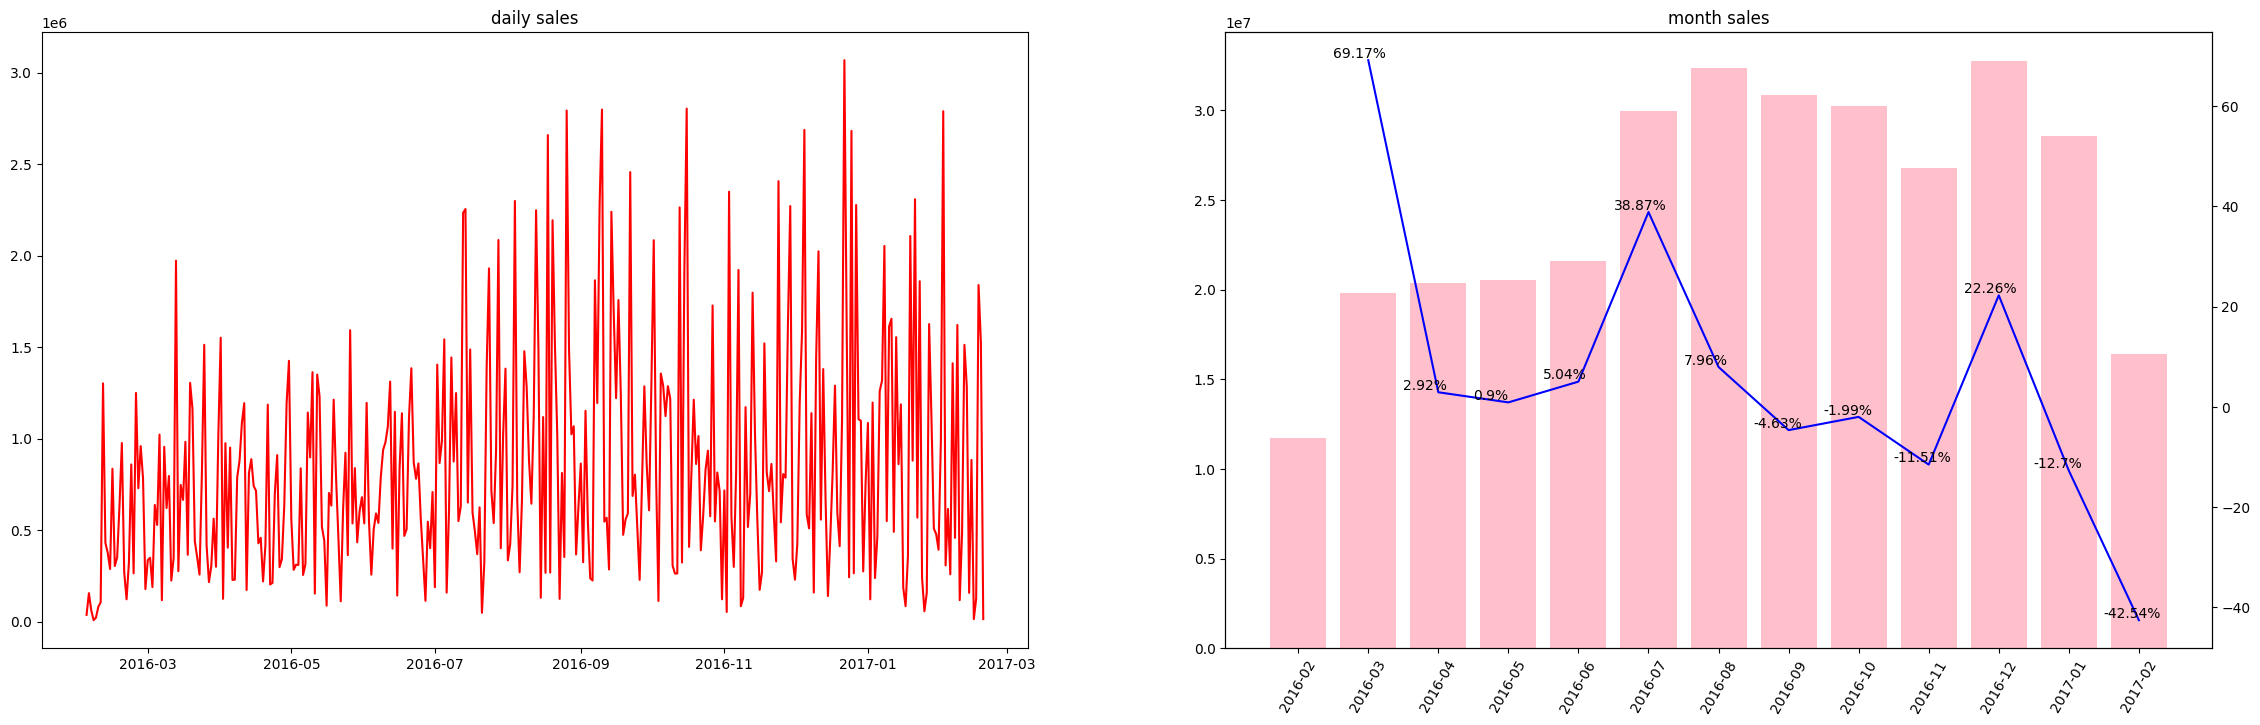

In [ ]:
# 创建长宽(16,5)的画布
fig = plt.figure(figsize=(28,8))

# 将画布分为两部分 1行2列 这里是第一个子图
ax1 = fig.add_subplot(121)
ax1.plot(df3.index,df3['Dollars'],c='r')  # 折线图plot(x轴数值,y轴数值,c线条颜色)
plt.title('daily sales')            # 子图1标题


# 第二个子图
ax2 = fig.add_subplot(122)
ax2.bar(range(13),month_sum['Dollars'],color='pink') # 柱状图bar(x轴,y轴,color颜色) color不可缩写为c x轴只能传入数字
plt.title('month sales')                  # 子图2标题
plt.xticks(range(13),month_sum.index,rotation=60)  # 设置x轴刻度格式，将数字变为日期 rotationx轴文字旋转角度

ax3 = ax2.twinx()  # 还是第二个子图,只是两张图画共用x轴
ax3.plot(range(13),month_sum['月环比'],c='b')

for i,j in enumerate(month_sum['月环比']):  # enumerate()函数输出的是索引及其值 如enumerate([1,2,3])  1的索引为0 所以会输出i=0,j=1
    plt.text(i-0.5,j+0.5,str(j)+'%')      # text(x,y,text)，在(x,y)上显示text

plt.show()  # 显示图画
